In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [15]:
batch_size = 32
img_height = 129
img_width = 295

train_ds = tf.keras.utils.image_dataset_from_directory(
	"birds",
	validation_split=0.2,
	subset="training",
	seed=123,
	image_size=(img_height, img_width),
	batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
	"birds",
	validation_split=0.2,
	subset="validation",
	seed=123,
	image_size=(img_height, img_width),
	batch_size=batch_size)


print(train_ds.class_names)
class_names = train_ds.class_names

Found 5422 files belonging to 5 classes.
Using 4338 files for training.
Found 5422 files belonging to 5 classes.
Using 1084 files for validation.
['American_Robin', "Bewick's_Wren", 'Northern_Cardinal', 'Northern_Mockingbird', 'Song_Sparrow']


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")


/home/nicolas/Documents/hepia/6eme_sem/smart_device/projet/.venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 129, 295, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 129, 295, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 147, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 147, 32)    │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 73, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,742,949 (18.09 MB)

 Trainable params: 4,742,949 (18.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 52s 376ms/step - accuracy: 0.3135 - loss: 2.1617 - val_accuracy: 0.5821 - val_loss: 0.9832
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 50s 370ms/step - accuracy: 0.6533 - loss: 0.8562 - val_accuracy: 0.7085 - val_loss: 0.7858
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 81s 366ms/step - accuracy: 0.7505 - loss: 0.6446 - val_accuracy: 0.7352 - val_loss: 0.7418
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 83s 371ms/step - accuracy: 0.8087 - loss: 0.5105 - val_accuracy: 0.7186 - val_loss: 0.7600
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 52s 385ms/step - accuracy: 0.8573 - loss: 0.3886 - val_accuracy: 0.7740 - val_loss: 0.6832
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 53s 386ms/step - accuracy: 0.9024 - loss: 0.2755 - val_accuracy: 0.7601 - val_loss: 0.8060
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 82s 387ms/step - accuracy: 0.9261 - loss: 0.2078 - val_accuracy: 0.7611 - val_loss: 0.8580
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 53s 390ms/step - accuracy: 0.9476 - loss: 0

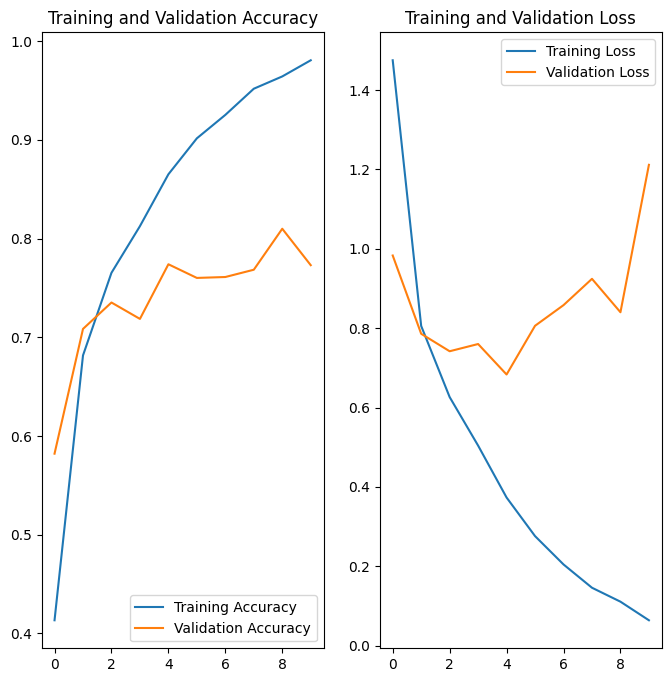

In [16]:
num_classes = len(class_names)

model = Sequential([
	layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
	layers.Conv2D(16, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Conv2D(32, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Conv2D(64, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Flatten(),
	layers.Dense(128, activation='relu'),
	layers.Dense(num_classes)
])

model.compile(
	optimizer='adam',
	loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
	metrics=['accuracy']
)

model.summary()

epochs=10
history = model.fit(
	train_ds,
	validation_data=val_ds,
	epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [18]:
model.save("birds.h5")